## Analyzing Historical Stock/Revenue Data and Building a Dashboard

In [ ]:
#import the needed modules
import pandas as pd
from bs4 import BeautifulSoup
import requests
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

### Question 1 - Extracting Tesla Stock Data Using yfinance

##### the tesla ticker symbol is __TSLA__ .

In [ ]:
Tesla = yf.Ticker("TSLA")

##### we now use the __history__  method to download the Tesla historical data

In [ ]:
tesla_stock_data = Tesla.history(period = "max")
tesla_stock_data.reset_index(inplace = True)
tesla_stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [ ]:
url = "https://companiesmarketcap.com/tesla/revenue/"
response = requests.get(url)
html_data = response.text
parsed_data = BeautifulSoup(html_data, "html.parser")

In [ ]:
table = parsed_data.find("table")
table

<table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Revenue</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td><span class="year">2024</span> (TTM) <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="31 Mar 2023 - 31 Mar 2024"/></td><td>$94.74 B</td><td class="percentage-red">-2.1%</td></tr><tr><td><span class="year">2023</span> <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="1 Jan 2023 - 31 Dec 2023"/></td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span> <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="1 Jan 2022 - 31 Dec 2022"/></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span> 

In [ ]:
# make a dataframe for the data above
# Extract the table headers
headers = [th.text.strip() for th in table.find('tr').find_all('th')]

# Extract the table data
data = []
for row in table.find_all('tr')[2:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append([col for col in cols])

# Create a DataFrame
tesla_df = pd.DataFrame(data, columns=headers)
tesla_df.tail()


,Year,Revenue,Change
10,2013,$2.01 B,387.23%
11,2012,$0.41 B,102.34%
12,2011,$0.20 B,74.95%
13,2010,$0.11 B,4.29%
14,2009,$0.11 B,


## Question 3 - Extracting GameStop Stock Data Using yfinance

##### the ticker symbol for GameStop is __GME__

In [ ]:
Gstop = yf.Ticker("GME")

##### we now use the __history__  method to download the GameStop historical data

In [ ]:
GameStop_data = Gstop.history(period = "max")
GameStop_data.reset_index(inplace = True)
GameStop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [ ]:
url_2 = "https://companiesmarketcap.com/gamestop/marketcap/"
response_2 = requests.get(url_2)
html_data = response_2.text
soup = BeautifulSoup(html_data, "html.parser")


In [ ]:
new_table = soup.find("table")
new_table

<table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Market cap</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td>2024</td><td>$10.50 B</td><td class="percentage-green">96.17%</td></tr><tr><td>2023</td><td>$5.35 B</td><td class="percentage-red">-4.75%</td></tr><tr><td>2022</td><td>$5.62 B</td><td class="percentage-red">-50.37%</td></tr><tr><td>2021</td><td>$11.32 B</td><td class="percentage-green">762.21%</td></tr><tr><td>2020</td><td>$1.31 B</td><td class="percentage-green">227.85%</td></tr><tr><td>2019</td><td>$0.40 B</td><td class="percentage-red">-68.85%</td></tr><tr><td>2018</td><td>$1.28 B</td><td class="percentage-red">-29.23%</td></tr><tr><td>2017</td><td>$1.81 B</td><td class="percentage-red">-29.34%</td></tr><tr><td>2016</td><td>$2.57 B</td><td class="percentage-red">-12.32%</td></tr><tr><td>2015</td><td>$2.93 B</td><td class="percentage-red">-19.98%</td></tr><tr><td>2014</td><td>$3.66 B</td><td class="percentage-red">-35.71%</td></tr><tr><td>2013</td><td

In [ ]:
# Extract the table headers
headers = [th.text.strip() for th in new_table.find('tr').find_all('th')]

# Extract the table data
data = []
for row in new_table.find_all('tr')[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append([col for col in cols])

# Create a DataFrame
gamestop_df = pd.DataFrame(data, columns=headers)
gamestop_df.tail()

,Year,Market cap,Change
18,2006,$4.17 B,81.66%
19,2005,$2.30 B,102.8%
20,2004,$1.13 B,32.93%
21,2003,$0.85 B,52.64%
22,2002,$0.55 B,


### Question 5 - Tesla Stock and Revenue Dashboard

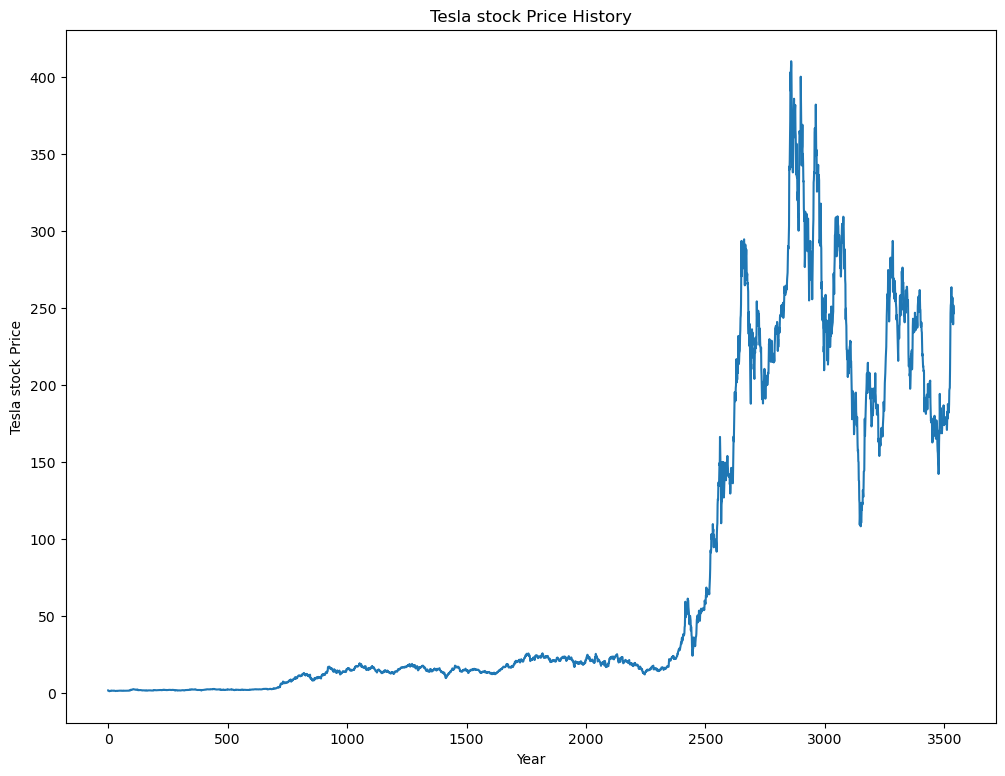

In [ ]:
# Plot the stock price data using seaborn
plt.figure(figsize=(12, 9))
sns.lineplot(x=tesla_stock_data.index, y=tesla_stock_data['Close'])
plt.title('Tesla stock Price History')
plt.xlabel('Year')
plt.ylabel('Tesla stock Price')
plt.show()

## Question 6 - GameStop Stock and Revenue Dashboard-

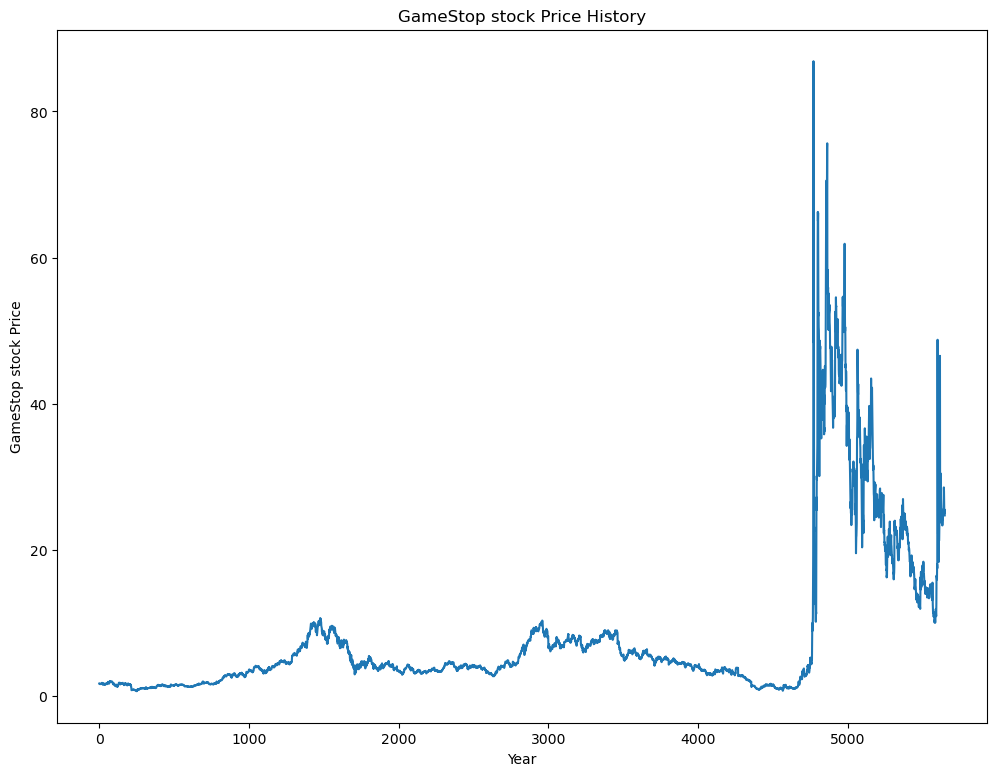

In [ ]:
# Plot the stock price data using seaborn
plt.figure(figsize=(12, 9))
sns.lineplot(x=GameStop_data.index, y=GameStop_data['Close'])
plt.title('GameStop stock Price History')
plt.xlabel('Year')
plt.ylabel('GameStop stock Price')
plt.show()